# <center> PANDAS : 
# <center> Эволюционный пинок - Часть 2
   

### <center> Панды
Больша́я па́нда, или бамбу́ковый медве́дь (лат. Ailuropoda melanoleuca) — вид всеядных млекопитающих из семейства медвежьих со своеобразной чёрно-белой окраской шерсти, обладающих некоторыми признаками енотов. Единственный современный вид рода Ailuropus подсемейства Ailuropodinae. Большие панды обитают в горных регионах центрального Китая: Сычуань и Тибет.
<center> <img src= "imgs/external-content.duckduckgo.com.jpeg" width=600></img>

### <center> Pandas

Загрузить данные и показать фрейм

In [15]:
from pathlib import Path
import pandas as pd
data_dir = Path('data')
path_data = data_dir.joinpath('raw_total_fight_data.csv')
path = 'data/raw_total_fight_data.csv'
df = pd.read_csv(path_data, delimiter=';')
df.head()

R_fighter       B_fighter  R_KD  B_KD  R_SIG_STR. B_SIG_STR.  \
0          Henry Cejudo   Marlon Moraes     0     0   90 of 171  57 of 119   
1  Valentina Shevchenko     Jessica Eye     1     0     8 of 11    2 of 12   
2         Tony Ferguson  Donald Cerrone     0     0  104 of 200  68 of 185   
3         Jimmie Rivera        Petr Yan     0     2   73 of 192  56 of 189   
4           Tai Tuivasa   Blagoy Ivanov     0     1   64 of 144  73 of 123   

  R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ... B_GROUND  \
0           52%           47%    99 of 182    59 of 121  ...   1 of 1   
1           72%           16%     37 of 40     42 of 52  ...   0 of 0   
2           52%           36%   104 of 200    68 of 185  ...   0 of 0   
3           38%           29%    76 of 195    58 of 192  ...  4 of 10   
4           44%           59%    66 of 146    81 of 131  ...   6 of 6   

                    win_by last_round last_round_time             Format  \
0                   KO/TKO          3            4:51  5 Rnd (5-5-5-5-5)   
1                   KO/TKO          2            0:26  5 Rnd (5-5-5-5-5)   
2  TKO - Doctor's Stoppage          2            5:00      3 Rnd (5-5-5)   
3     Decision - Unanimous          3            5:00      3 Rnd (5-5-5)   
4     Decision - Unanimous          3            5:00      3 Rnd (5-5-5)   

           Referee           date                location  \
0     Marc Goddard  June 08, 2019  Chicago, Illinois, USA   
1  Robert Madrigal  June 08, 2019  Chicago, Illinois, USA   
2  Dan Miragliotta  June 08, 2019  Chicago, Illinois, USA   
3  Kevin MacDonald  June 08, 2019  Chicago, Illinois, USA   
4  Dan Miragliotta  June 08, 2019  Chicago, Illinois, USA   

                         Fight_type                Winner  
0       UFC Bantamweight Title Bout          Henry Cejudo  
1  UFC Women's Flyweight Title Bout  Valentina Shevchenko  
2                  Lightweight Bout         Tony Ferguson  
3                 Bantamweight Bout              Petr Yan  
4                  Heavyweight Bout         Blagoy Ivanov  

[5 rows x 41 columns]

#### Первичный анализ

Показать основную информацию

### Категории

<center> <img  src="imgs/4.jpeg" width=800></img>

In [25]:
for column_name in df.select_dtypes(include='object'):
    print(column_name, df[column_name].nunique())

R_fighter 1334
B_fighter 1774
R_SIG_STR. 3038
B_SIG_STR. 2903
R_SIG_STR_pct 95
B_SIG_STR_pct 90
R_TOTAL_STR. 3681
B_TOTAL_STR. 3479
R_TD 157
B_TD 154
R_TD_pct 69
B_TD_pct 62
R_HEAD 2620
B_HEAD 2475
R_BODY 541
B_BODY 508
R_LEG 393
B_LEG 355
R_DISTANCE 2382
B_DISTANCE 2391
R_CLINCH 472
B_CLINCH 469
R_GROUND 641
B_GROUND 465
win_by 10
last_round_time 333
Format 19
Referee 190
date 476
location 157
Fight_type 112
Winner 1267


In [20]:
print(df['win_by'].unique().tolist())
categories = [
     'Не категория', # 0
     'KO/TKO',  # 1
     "TKO - Doctor's Stoppage",
     'Decision - Unanimous',
     'Submission',
     'Decision - Split',
     'Decision - Majority',
     'DQ',
     'Overturned',
     'Could Not Continue',
     'Other',
    'MR'
]

['KO/TKO', "TKO - Doctor's Stoppage", 'Decision - Unanimous', 'Submission', 'Decision - Split', 'Decision - Majority', 'DQ', 'Overturned', 'Could Not Continue', 'Other']


Перевести в Категорию колонку win_by c помощью categories

In [28]:
raw_cats = pd.Categorical(df['win_by'], categories=categories, ordered=True)
win_by = pd.Series(raw_cats)
win_by.head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
dtype: category
Categories (12, object): [Не категория < KO/TKO < TKO - Doctor's Stoppage < Decision - Unanimous ... Overturned < Could Not Continue < Other < MR]

Ну или просто

In [31]:
df['win_by'].astype('category').head()

0                     KO/TKO
1                     KO/TKO
2    TKO - Doctor's Stoppage
3       Decision - Unanimous
4       Decision - Unanimous
Name: win_by, dtype: category
Categories (10, object): [Could Not Continue, DQ, Decision - Majority, Decision - Split, ..., Other, Overturned, Submission, TKO - Doctor's Stoppage]

In [32]:
old_mem_usage = df['win_by'].memory_usage(deep='True')
new_mem_usage = win_by.memory_usage(deep='True')
print('Прежнее потребление памяти: ', old_mem_usage)
print('После конвертации ', new_mem_usage)
print('Улучшение в потребляемой памяти {:.2f}'.format(old_mem_usage / new_mem_usage))

Прежнее потребление памяти:  6291
После конвертации  6480
Улучшение в потребляемой памяти 0.97


### Resample

<center> <img src="imgs/pandalast.jpeg" width=800>

Конвертирование дат - конвертируйте в datetime с помощью метода to_datetime

Добавим как индекс

Пример 

In [37]:
df.resample('1M')['last_round'].mean().tail(5)

date
2019-02-28    2.183673
2019-03-31    2.451613
2019-04-30    2.540541
2019-05-31    2.567568
2019-06-30    2.520000
Freq: M, Name: last_round, dtype: float64

In [ ]:
# Теперь медиану

### Method Chaining

<center> <img src="imgs/redpanda.jpeg" width=600>

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

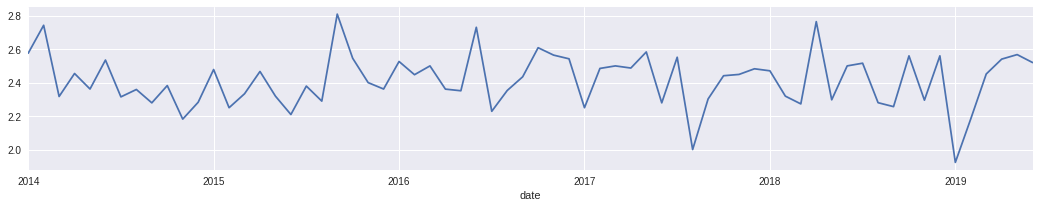

In [39]:
df = df.set_index(date)
last_round_data = df.resample('1M')['last_round'].mean()
last_round_data = last_round_data.fillna(0)
filtered_last_round_data = last_round_data['2014-01-01':]
filtered_last_round_data.plot(figsize=(18, 3));

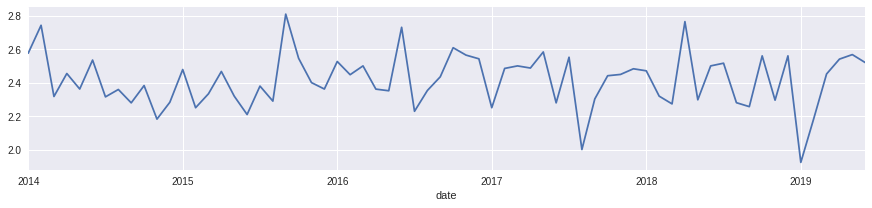

In [40]:
(
    df.set_index(date)
    .resample('1M')
    ['last_round'].mean()
    .fillna(0)
    .loc['2014-01-01':]
    .plot(figsize=(15, 3))
);

1. Создать колонку cities из location - 0 колонка внутри
2. Двухурвневая группировка - а) Время, по минутам б) cities
3. Среднее last_round
4. to frame
5. Взять только с 2014 года - slicer
6. Голова

In [57]:
slicer = pd.IndexSlice

last_round
date       cities                    
2014-01-31 Chicago           2.636364
           Duluth            2.583333
           Singapore         2.500000
2014-02-28 Jaragua do Sul    3.000000
           Las Vegas         2.272727

### Pipelines

In [58]:
# Мы бы хотели делать так
# (
#   df.clean_dataset()
#     .filter_data()
#     .add_super_feauters()
#     .make_cofee()
# )

In [45]:
# Но делаем максимум так
# clean_df = clean_dataset(df)
# filtered_df = filter_data(clean_df)
# super_df = add_super_feauters(filtered_df)
# cofee = make_cofee(super_df)

Минусы:  
    -  Больший расход памяти и времени
    -  Искусственные переменные
Плюсы:
    -  Контролируемость процесса обработки данных
    -  Дебаггинг

In [59]:
def make_smth_stange(df):
    """
    DO SOMETHING
    """
    return df

In [60]:
result = df.pipe(make_smth_stange)
result.equals(df)  

True

In [61]:
def filter_dataset(df):
    return df.loc[:'2014'].query('B_fighter == "Marlon Moraes"')

In [62]:
df.pipe(filter_dataset)

R_fighter      B_fighter  R_KD  B_KD R_SIG_STR. B_SIG_STR.  \
date                                                                            
2019-06-08      Henry Cejudo  Marlon Moraes     0     0  90 of 171  57 of 119   
2019-02-02  Raphael Assuncao  Marlon Moraes     0     1    2 of 12   10 of 23   
2018-06-01     Jimmie Rivera  Marlon Moraes     0     1     0 of 3     7 of 9   
2017-11-11       John Dodson  Marlon Moraes     1     0  43 of 105  45 of 131   
2017-06-03  Raphael Assuncao  Marlon Moraes     0     0  43 of 134  44 of 150   

           R_SIG_STR_pct B_SIG_STR_pct R_TOTAL_STR. B_TOTAL_STR.  ...  \
date                                                              ...   
2019-06-08           52%           47%    99 of 182    59 of 121  ...   
2019-02-02           16%           43%      3 of 13     12 of 25  ...   
2018-06-01            0%           77%       0 of 3       7 of 9  ...   
2017-11-11           40%           34%    47 of 109    45 of 131  ...   
2017-06-03           32%           29%    43 of 134    44 of 150  ...   

           B_GROUND            win_by last_round last_round_time  \
date                                                               
2019-06-08   1 of 1            KO/TKO          3            4:51   
2019-02-02   3 of 5        Submission          1            3:17   
2018-06-01   5 of 6            KO/TKO          1            0:33   
2017-11-11   0 of 0  Decision - Split          3            5:00   
2017-06-03   0 of 0  Decision - Split          3            5:00   

                       Format          Referee               date  \
date                                                                
2019-06-08  5 Rnd (5-5-5-5-5)     Marc Goddard      June 08, 2019   
2019-02-02  5 Rnd (5-5-5-5-5)     Jason Herzog  February 02, 2019   
2018-06-01  5 Rnd (5-5-5-5-5)  Dan Miragliotta      June 01, 2018   
2017-11-11      3 Rnd (5-5-5)  Bill Bookwalter  November 11, 2017   
2017-06-03      3 Rnd (5-5-5)      Osiris Maia      June 03, 2017   

                                          location  \
date                                                 
2019-06-08                  Chicago, Illinois, USA   
2019-02-02                Fortaleza, Ceara, Brazil   
2018-06-01                    Utica, New York, USA   
2017-11-11                  Norfolk, Virginia, USA   
2017-06-03  Rio de Janeiro, Rio de Janeiro, Brazil   

                             Fight_type            Winner  
date                                                       
2019-06-08  UFC Bantamweight Title Bout      Henry Cejudo  
2019-02-02            Bantamweight Bout     Marlon Moraes  
2018-06-01            Bantamweight Bout     Marlon Moraes  
2017-11-11            Bantamweight Bout     Marlon Moraes  
2017-06-03            Bantamweight Bout  Raphael Assuncao  

[5 rows x 41 columns]

Simulation

In [88]:
def get_linear_birth_rates(birth_rate: float, 
                    forecast_duration: int, 
                    change_factor: float, 
                    min_fertility: float):
    """
        Возвращает список crude birth rate по периодам 
        на будущие forecast_duration периодов
    """
    birth_rates = []
    for _ in range(forecast_duration):
        birth_rate *= change_factor
        if birth_rate <= min_fertility:
            birth_rate = min_fertility
        birth_rates.append(birth_rate)

    return birth_rates

In [125]:
def population_change(forecast_duration: int, 
                      init_birth_rate: float, 
                      init_death_rate: float, 
                      init_pop_size: int, 
                      change_factor: float, 
                      min_fertility: float ) -> list:
    """
        Предсказывает изменения в росте популяции
    """
    population_size = int(init_pop_size)
    pops = []
    
    birth_rates = get_linear_birth_rates(
        init_birth_rate, 
        forecast_duration,
        change_factor,
        min_fertility
    )
    print(birth_rates[-1])
    for year in range(forecast_duration):
        total_birth = birth_rates[year] * population_size 
        total_death = init_death_rate * population_size
        difference = total_birth - total_death
        population_size += difference
        population_size = population_size
        pops.append(population_size)
    return pops, birth_rates

In [126]:
# EUROPE
ITALY_FERTILITY_CHANGE = 0.96
ITALY_DEATH_RATE = 0.015    # as in Italy 2019
ITALY_BIRTH_RATE = 0.007    # Italy 2019
ITALY_INIT_POP_SIZE = 54 * 10 **6
ITALY_MIN_FERTILITY_RATE = 0.003

# MUSLIM
MUSLIM_FERTILITY_CHANGE = 0.99 
MUSLIM_DEATH_RATE = 0.005    # as in Egypt 2017
MUSLIM_BIRTH_RATE = 0.027     # Egypt 2017
MUSLIM_INIT_POP_SIZE = 1.6 * 10 ** 6     # Pew Research 2016
MUSLIM_MIN_FERTILITY = 0.01
MUSLIM_FERTILITY_CHANGE, ITALY_FERTILITY_CHANGE

(0.99, 0.96)

In [127]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [133]:
forecast_duration = 100    # in years

italy_pop, italy_birth_rates = population_change(forecast_duration, 
                        ITALY_BIRTH_RATE, 
                        ITALY_DEATH_RATE, 
                        ITALY_INIT_POP_SIZE, 
                        ITALY_FERTILITY_CHANGE, 
                        ITALY_MIN_FERTILITY_RATE)

muslim_pop, muslim_birth_rates = population_change(forecast_duration, 
                        MUSLIM_BIRTH_RATE, 
                        MUSLIM_DEATH_RATE, 
                        MUSLIM_INIT_POP_SIZE, 
                        MUSLIM_FERTILITY_CHANGE, 
                        MUSLIM_MIN_FERTILITY)

init_share = MUSLIM_INIT_POP_SIZE / (MUSLIM_INIT_POP_SIZE + ITALY_INIT_POP_SIZE)
new_share = muslim_pop[-1] / (muslim_pop[-1] + italy_pop[-1])
print(f'Inital Share of Muslim Population {init_share: .2%}')
print(f'Forecasted Share of Muslim Population {new_share: .2%}')
print(f'Italy population {int(italy_pop[-1])}',)
print(f'Muslim population {int(muslim_pop[-1])}', )

0.003
0.01
Inital Share of Muslim Population  2.88%
Forecasted Share of Muslim Population  23.88%
Italy population 16707169
Muslim population 5240906


Давайте построим график

Для birth rates теперь

Санализируем настоящие данные

In [143]:
url = 'http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel'
# pip install xlrd
crude_birth_rate = pd.read_excel(url, header=3)
crude_birth_rate.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2010  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.768   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  5.977   
2  SP.DYN.TFRT.IN  6.708  6.790  6.872  6.954  7.036  7.116  ...  6.194   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.660   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.270   

    2011   2012   2013   2014   2015   2016   2017   2018  2019  
0  1.779  1.795  1.813  1.834  1.854  1.872  1.886  1.896   NaN  
1  5.770  5.562  5.359  5.163  4.976  4.800  4.633  4.473   NaN  
2  6.120  6.039  5.953  5.864  5.774  5.686  5.600  5.519   NaN  
3  1.673  1.684  1.690  1.688  1.677  1.659  1.638  1.617   NaN  
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN  

[5 rows x 64 columns]

In [145]:
not_neede_columns = ['Country Code', 'Indicator Name', 'Indicator Code']
crude_birth_rate = (
    crude_birth_rate
        .drop(not_neede_columns, axis=1)
        .set_index('Country Name')
)

Построим несколько графиков

# Resources

Книга по Pandas и не только:  <br>
https://jakevdp.github.io/PythonDataScienceHandbook/  <br>
<br>
Серия статей по продвинотому pandas:  <br>
https://tomaugspurger.github.io/modern-1-intro<br>
<br>
Список туториалов от самого pandas:  <br>
https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html<br>


Презентацию можно будет достать по ссылке:   
https://github.com/carnotaur/pandas_tutorial